# 3. 一般化線形モデル (GLM)

(ざっくり要約)

* 統計モデル作成に先立ってデータを図示すること．
* Rの (そしてPythonの) glm関数では，ダミー変数を作成しておく必要がない．
* GLMは，「確率分布」「リンク関数」「線形予測子」を指定する統計モデルである．
* R (やPython) のglmでpoissonファミリーを確率分布に指定した場合，リンク関数を指定せずとも正準リンク関数であるlogが利用される．
    * 対数リンク関数を利用するのは，「計算に都合が良い」 + 「解釈しやすい (意訳)」から
    * 計算面: 対数リンク関数で変換した値はpoisson分布と同様常に0以上の値を取る．
    * 解釈面: 対数リンク関数によって，線形結合は，各演算子の相乗のかたちに変換される．
        * 詳細は久保先生の公開資料で → http://hosho.ees.hokudai.ac.jp/~kubo/stat/2012/kobe/k2/kubostat2012k2.pdf (第12章を参照)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
d = pd.read_csv('data3a.csv')

In [3]:
d.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [4]:
d['x'].values[:5]

array([  8.31,   9.44,   9.5 ,   9.07,  10.16])

In [5]:
d['y'].values[:5]

array([ 6,  6,  6, 12, 10])

In [6]:
d['f'].values[:5]

array(['C', 'C', 'C', 'C', 'C'], dtype=object)

In [7]:
type(d)  # dはpd.DataFrameのインスタンス

pandas.core.frame.DataFrame

In [8]:
type(d['y'].values[0])  # y列は整数だけなのでint

numpy.int64

In [9]:
type(d['x'].values[0])  # x列は実数も含むのでfloat

numpy.float64

In [10]:
type(d['f'].values[0])  # fは文字列なのでstr

str

In [11]:
# include引数を指定しない場合，fについては記述されないので注意
d.describe(include='all')

,y,x,f
count,100.000000,100.000000,100
unique,NaN,NaN,2
top,NaN,NaN,C
freq,NaN,NaN,50
mean,7.830000,10.089100,NaN
std,2.624881,1.008049,NaN
min,2.000000,7.190000,NaN
25%,6.000000,9.427500,NaN
50%,8.000000,10.155000,NaN
75%,10.000000,10.685000,NaN


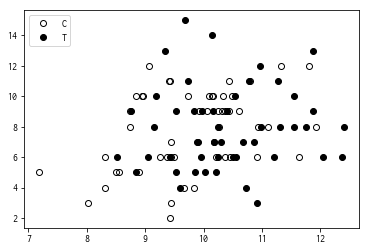

In [12]:
plt.plot(d.loc[d['f'] == 'C', 'x'],
         d.loc[d['f'] == 'C', 'y'],
         'ko', fillstyle='none', label='C',)
plt.plot(d.loc[d['f'] == 'T', 'x'],
         d.loc[d['f'] == 'T', 'y'],
         'ko', fillstyle='full', label='T')
plt.legend(loc='upper left')

In [13]:
fit = smf.glm('y ~ x', data=d, family=sm.families.Poisson()).fit()
# sm.families.Poisson() <=>
# sm.families.Poisson(link=sm.families.links.identity)

In [14]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Fri, 24 Feb 2017   Deviance:                       84.993
Time:                        10:20:27   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [15]:
print(fit.llf)  # the value of the "likelihood function"
print(fit.df_model)  # 教科書だと2になる．自由に変動できるβは1個ではないのか?

-235.38625077
1


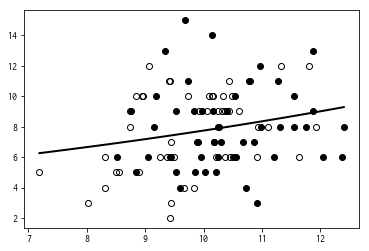

In [16]:
plt.plot(d.loc[d['f'] == 'C', 'x'],
         d.loc[d['f'] == 'C', 'y'],
         'ko', fillstyle='none', label='C',)
plt.plot(d.loc[d['f'] == 'T', 'x'],
         d.loc[d['f'] == 'T', 'y'],
         'ko', fillstyle='full', label='T')
xx = np.linspace(d['x'].min(), d['x'].max(), 100)
plt.plot(xx, np.exp(1.29 + 0.0757 * xx), 'k-', lw=2)

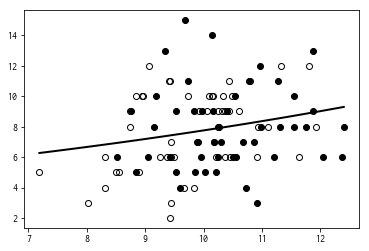

In [17]:
plt.plot(d.loc[d['f'] == 'C', 'x'],
         d.loc[d['f'] == 'C', 'y'],
         'ko', fillstyle='none', label='C',)
plt.plot(d.loc[d['f'] == 'T', 'x'],
         d.loc[d['f'] == 'T', 'y'],
         'ko', fillstyle='full', label='T')
yy = fit.predict(pd.Series(xx, name='x'))
plt.plot(xx, yy, 'k-', lw=2)

In [18]:
fit_f = smf.glm('y ~ f', data=d, family=sm.families.Poisson()).fit()
fit_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Fri, 24 Feb 2017   Deviance:                       89.475
Time:                        10:20:27   Pearson chi2:                     87.1
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [19]:
fit_f.llf

-237.62725696068685

In [20]:
fit_all = smf.glm('y ~ x + f', data=d,
                  family=sm.families.Poisson()).fit()
fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Fri, 24 Feb 2017   Deviance:                       84.808
Time:                        10:20:27   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [21]:
fit_all.llf

-235.29371924249369

In [22]:
# おまけ: デフォルトの確率分布はガウシアンである．
# ここで，正規分布の最尤推定と最小二乗法による線形回帰は同じ結果になる．
smf.glm('y ~ x + f', data=d).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   6.65220528379
Method:                          IRLS   Log-Likelihood:                -235.12
Date:                Fri, 24 Feb 2017   Deviance:                       645.26
Time:                        10:20:27   Pearson chi2:                     645.
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6169      2.653      0.610      0.542      -3.582       6.816
f[T.T]        -0.2538      0.537     -0.472      0.637      -1.307       0.800
x              0.6284      0.268      2.345      0.019       0.103       1.154
==============================================================================
"""

In [23]:
smf.ols('y ~ x + f', data=d).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.769
Date:                Fri, 24 Feb 2017   Prob (F-statistic):             0.0677
Time:                        10:20:27   Log-Likelihood:                -235.12
No. Observations:                 100   AIC:                             476.2
Df Residuals:                      97   BIC:                             484.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6169      2.653      0.610      0.544      -3.648       6.882
f[T.T]        -0.2538      0.537     -0.472      0.638      -1.320       0.813
x              0.6284      0.268      2.345      0.021       0.097       1.160
==============================================================================
Omnibus:                        2.118   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                2.001
Skew:                           0.342   Prob(JB):                        0.368
Kurtosis:                       2.890   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""